<a href="https://colab.research.google.com/github/parthd2804/customer-churn-ML/blob/main/Copy_of_Telcom_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Step 1: Initial Data Load and Inspection

#### 1. Load the dataset

In [ ]:
# Load the dataset
import pandas as pd
df = pd.read_csv('./Telco_Customer_Churn.csv')

#### 2. Inspect the First Few Rows

In [ ]:
# Inspect the First Few Rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### 3. Profile report for in-depath dataset analysis

In [ ]:
# Check Data Types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### Summary Statistics

This gives us basic statistics for numerical columns, which helps understand data distributions

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


#### Detailed Dataset Analysis

In [ ]:
# 1. Basic Information
print("Dataset Shape:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())

# 2. Summary Statistics
print("\nSummary Statistics:\n", df.describe(include='all'))

# 3. Check Unique Values
print("\nUnique Values in Each Column:\n", df.nunique())

# 4. Check for Duplicates
print("\nDuplicate Rows:", df.duplicated().sum())

# 5. Target Variable Distribution
print("\nTarget Variable Distribution:\n", df['Churn'].value_counts(normalize=True))

# 6. Correlation for Numerical Columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("\nCorrelation Matrix:\n", df[numerical_cols].corr())

# Optional: Install and use pandas-profiling for a detailed report
# pip install pandas-profiling
from pandas_profiling import ProfileReport
profile = ProfileReport(df, title="Telco Customer Churn Profiling Report", explorative=True)
profile.to_file("Telco_Customer_Churn_Profiling_Report.html")

Dataset Shape: (7043, 21)

Data Types:
 customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Missing Values:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract  

C:\Users\Unknown1\AppData\Local\Temp\ipykernel_712\4223242245.py:24: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

#### Thoughts on intitial analysis of data

## Step 2: Exploratory Data Analysis (EDA)

#### 1. Convert TotalCharges to Numerics

In [ ]:
# Convert TotalCharges to numeric, and coerce any non-numeric values to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Count missing values in TotalCharges (if any) and fill with median or mean
missing_total_charges = df['TotalCharges'].isna().sum()
print("Missing values in TotalCharges:", missing_total_charges)

# Fill missing values with the median of TotalCharges
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())


Missing values in TotalCharges: 11


#### 2. Visualize Numerical Distributions

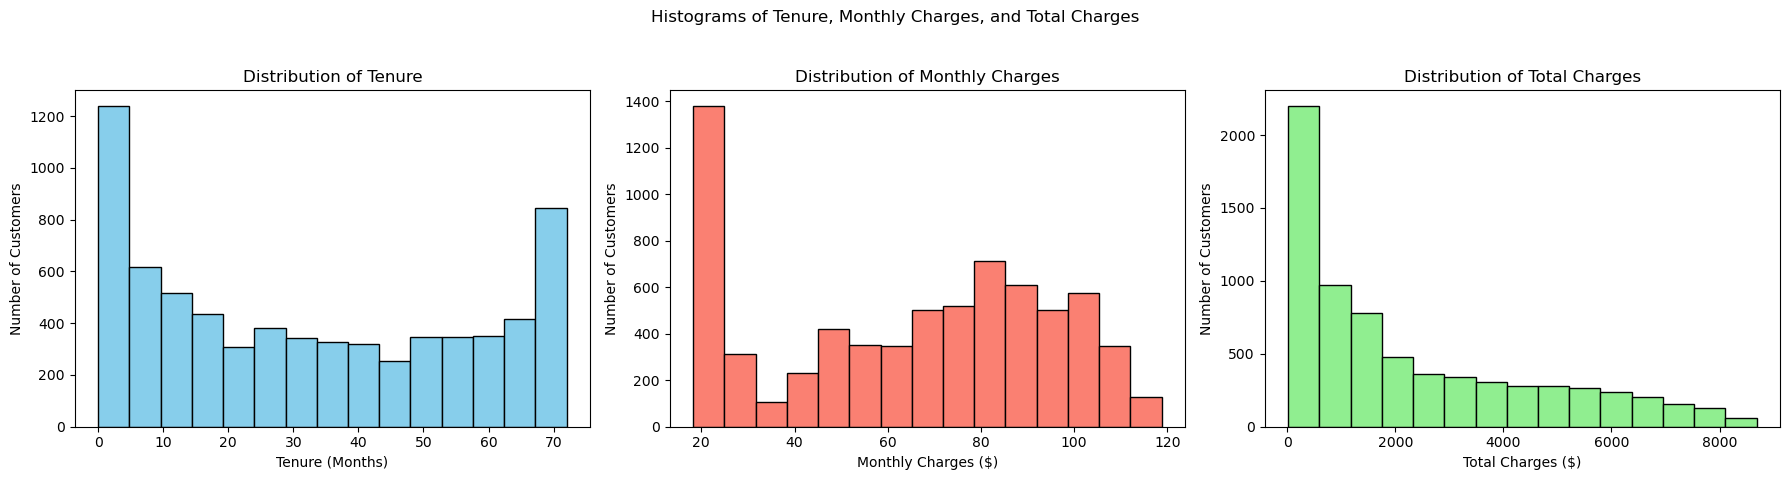

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

# Plot histograms for tenure, MonthlyCharges, and TotalCharges with labels
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Tenure histogram
axes[0].hist(df['tenure'], bins=15, color='skyblue', edgecolor='black')
axes[0].set_title('Distribution of Tenure')
axes[0].set_xlabel('Tenure (Months)')
axes[0].set_ylabel('Number of Customers')

# MonthlyCharges histogram
axes[1].hist(df['MonthlyCharges'], bins=15, color='salmon', edgecolor='black')
axes[1].set_title('Distribution of Monthly Charges')
axes[1].set_xlabel('Monthly Charges ($)')
axes[1].set_ylabel('Number of Customers')

# TotalCharges histogram
axes[2].hist(df['TotalCharges'], bins=15, color='lightgreen', edgecolor='black')
axes[2].set_title('Distribution of Total Charges')
axes[2].set_xlabel('Total Charges ($)')
axes[2].set_ylabel('Number of Customers')

plt.suptitle('Histograms of Tenure, Monthly Charges, and Total Charges')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


#### 3. Plot Categorical Features Against Churn

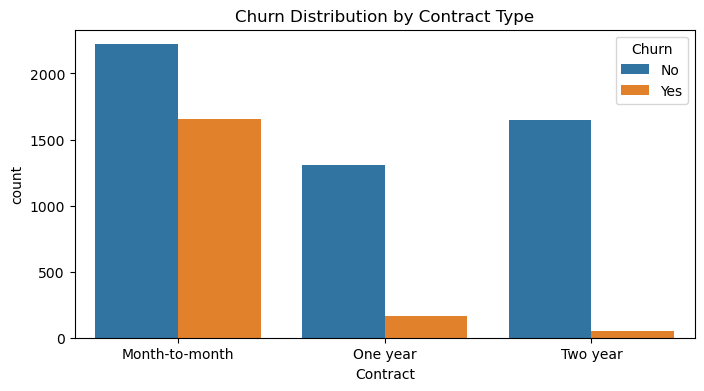

In [ ]:
import seaborn as sns

# Plot for Contract type by Churn
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title('Churn Distribution by Contract Type')
plt.show()


#### 4. Correlation Heatmap for Numerical Features

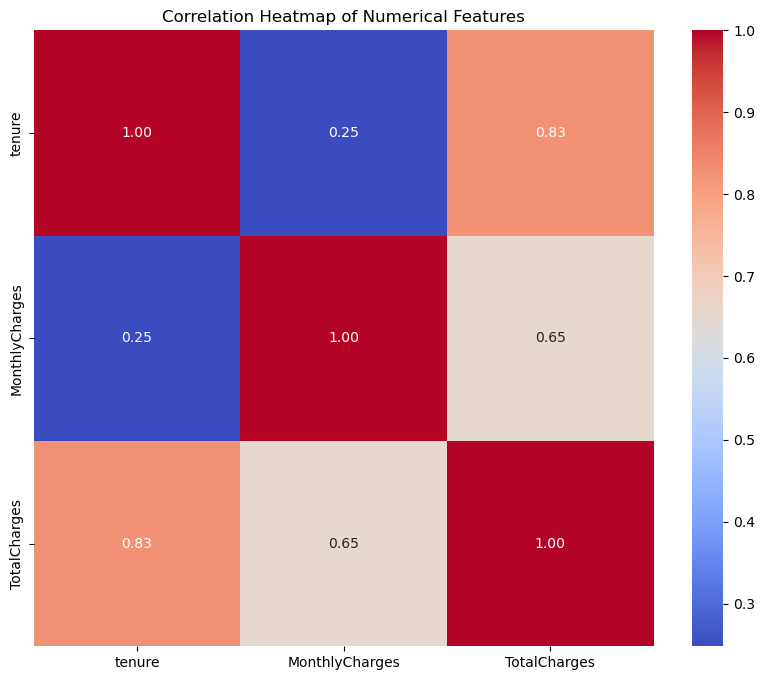

In [ ]:
# Plot correlation heatmap for numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(df[['tenure', 'MonthlyCharges', 'TotalCharges']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


#### 1. Churn Rate by Categorical Variables

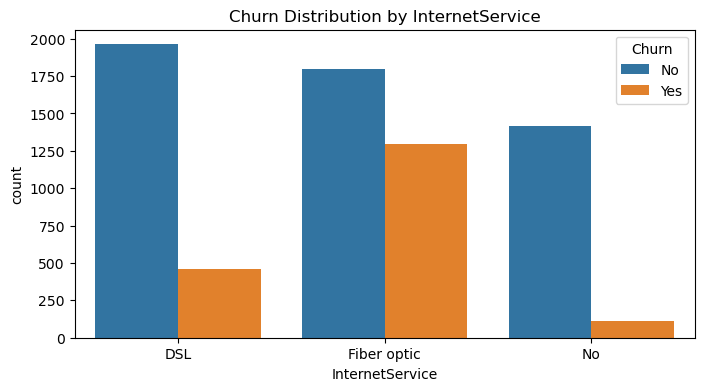

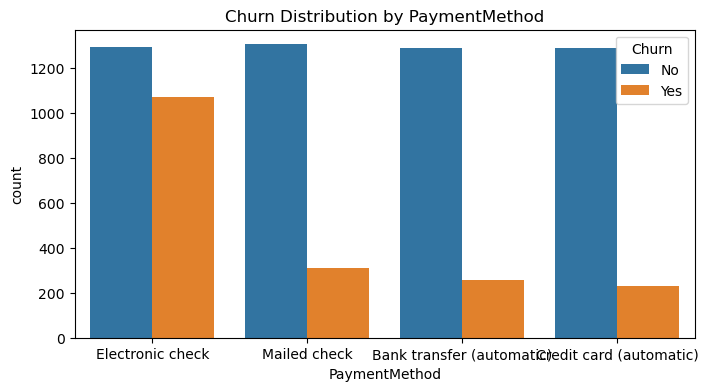

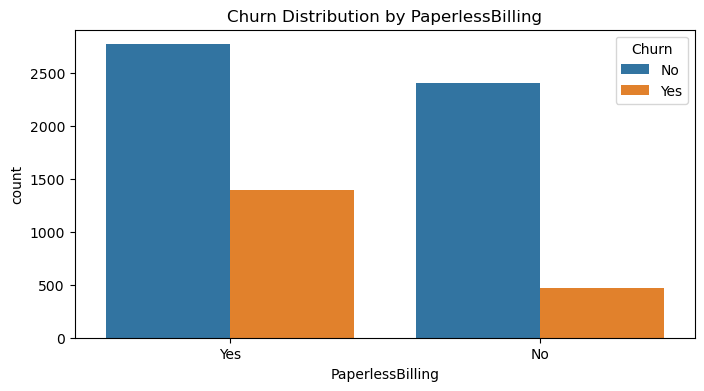

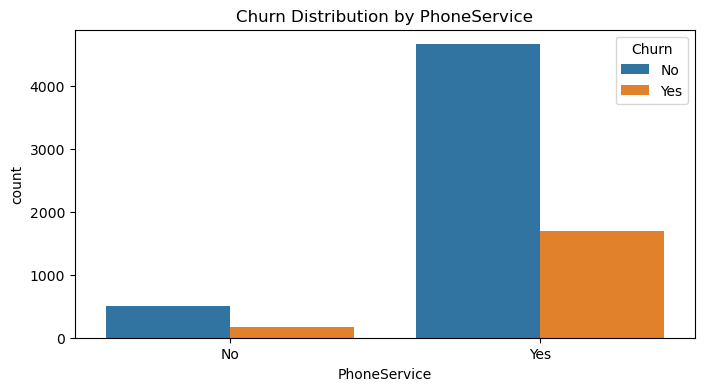

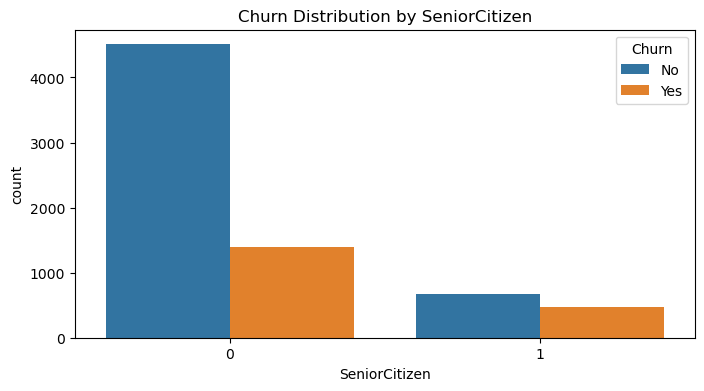

In [ ]:
categorical_features = ['InternetService', 'PaymentMethod', 'PaperlessBilling', 'PhoneService', 'SeniorCitizen']

for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=feature, hue='Churn')
    plt.title(f'Churn Distribution by {feature}')
    plt.show()


#### 2. Numerical Feature Analysis by Churn

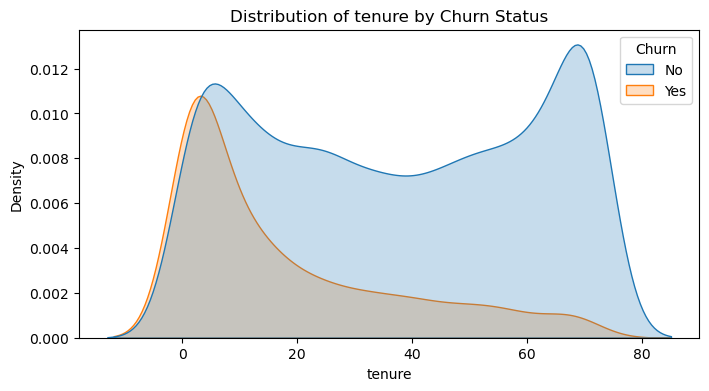

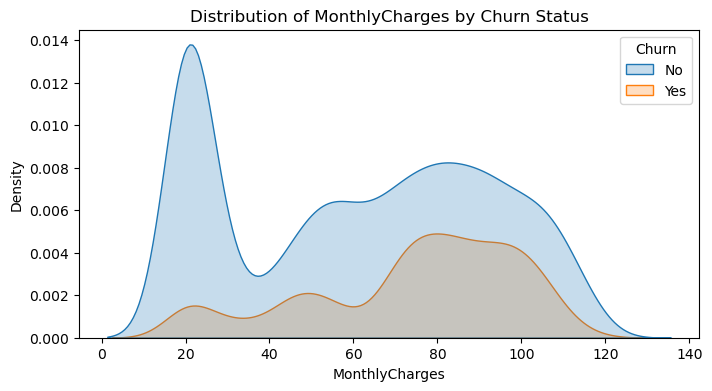

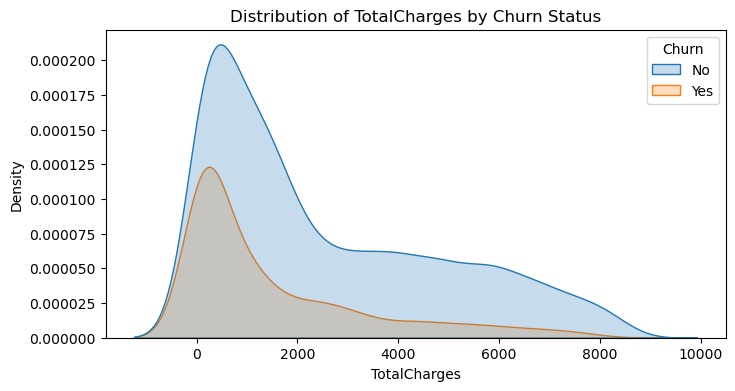

In [ ]:
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(data=df, x=feature, hue='Churn', fill=True)
    plt.title(f'Distribution of {feature} by Churn Status')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.show()


#### 3. Bivariate Analysis of Key Features

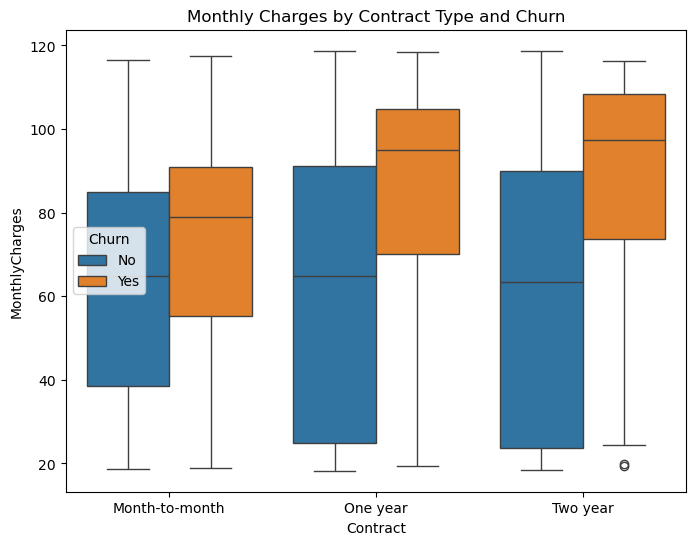

In [ ]:
# Contract type vs Monthly Charges, split by Churn
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Contract', y='MonthlyCharges', hue='Churn')
plt.title('Monthly Charges by Contract Type and Churn')
plt.show()

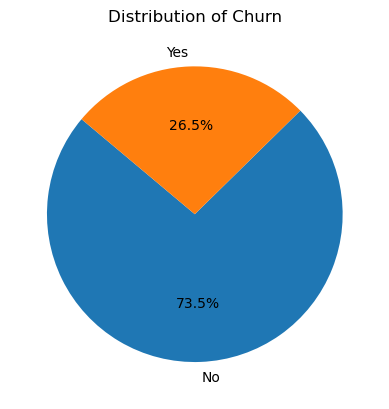

In [ ]:
# Re-importing matplotlib for plotting
import matplotlib.pyplot as plt

# Assuming the dataset is already loaded in df, recreating a pie chart for the 'Churn' variable
churn_counts = df['Churn'].value_counts()
labels = churn_counts.index
sizes = churn_counts.values

# Creating the pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Churn')
plt.show()


#### 5. Further Correlation Analysis with Churn

In [ ]:
# Ensure only numeric columns are used in correlation calculation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Add the encoded Churn column to the numeric-only DataFrame
numeric_df['Churn_Encoded'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Calculate correlations with the Churn_Encoded column
correlations_with_churn = numeric_df.corr()['Churn_Encoded'].sort_values(ascending=False)
print("Correlations with Churn:\n", correlations_with_churn)

Correlations with Churn:
 Churn_Encoded     1.000000
MonthlyCharges    0.193356
SeniorCitizen     0.150889
TotalCharges     -0.199037
tenure           -0.352229
Name: Churn_Encoded, dtype: float64


## Step 3: Data Preprocessing

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### 1. Feature Selection and Engineering

In [ ]:
# Create a copy of the original dataset after EDA
df_clean = df.copy()
df_clean.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Drop 'customerID' column only if it exists
if 'customerID' in df_clean.columns:
    df_clean = df_clean.drop(['customerID'], axis=1)


# Ensure the target column is separated
X = df_clean.drop('Churn', axis=1)
y = df_clean['Churn']

#### 2. Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### 3. Preprocessing Pipelines

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Identify numerical and categorical columns
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns

# Create a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ]
)

# Verify preprocessor setup by fitting on training data only
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

## Step 4: Model Training with Baseline Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

# Create a pipeline for the model
model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

# Train the model
model_pipeline.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = model_pipeline.predict(X_test)
y_pred_prob = model_pipeline.predict_proba(X_test)[:, 1]

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_prob))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8211497515968772
AUC-ROC: 0.8621334375355824

Classification Report:
               precision    recall  f1-score   support

          No       0.86      0.90      0.88      1036
         Yes       0.69      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.82      0.82      0.82      1409



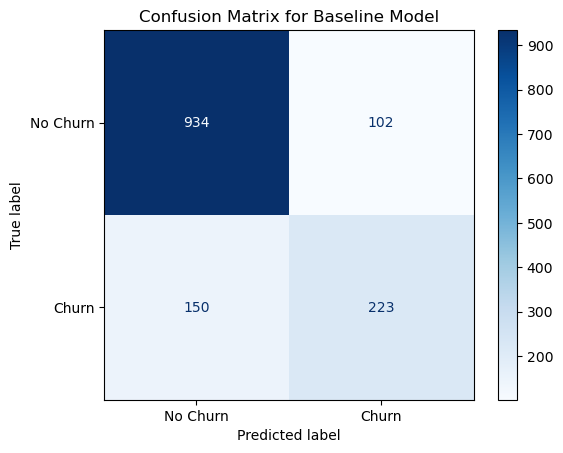

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['No Churn', 'Churn'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for Baseline Model')
plt.show()


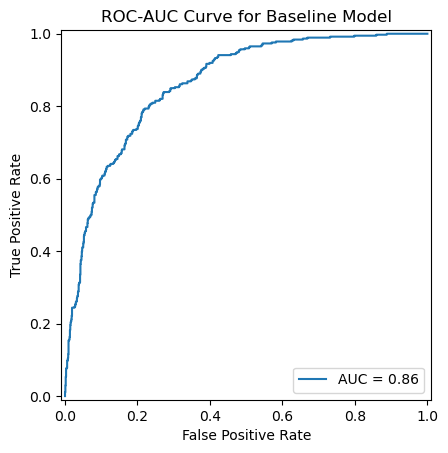

In [ ]:
from sklearn.metrics import roc_curve, RocCurveDisplay

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob, pos_label='Yes')

# Display the ROC curve
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc_score(y_test, y_pred_prob))
roc_display.plot()
plt.title('ROC-AUC Curve for Baseline Model')
plt.show()


#### Step 5: Validation with Cross-Validation

Use cross-validation to ensure that the model generalizes well.

In [ ]:
from sklearn.model_selection import cross_val_score

# Cross-validate the model
cv_scores = cross_val_score(model_pipeline, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())


Cross-validation scores: [0.81011535 0.80834073 0.79769299 0.78970719 0.80195382]
Mean cross-validation score: 0.801562014874681


# Part 2 of our project journey

#### Doing pre-processing for data again to prepare for it's second journey

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

df_processed = df_clean.copy()
# Drop 'customerID' column only if it exists
if 'customerID' in df_processed.columns:
    df_processed = df_processed.drop(['customerID'], axis=1)

# Step 2: Handle missing or invalid values
# Convert TotalCharges to numeric, coerce errors to NaN, and fill NaN with median
df_processed['TotalCharges'] = pd.to_numeric(df_processed['TotalCharges'], errors='coerce')
df_processed['TotalCharges'] = df_processed['TotalCharges'].fillna(df_processed['TotalCharges'].median())

# Add feature engineering to the dataset

# Step 1: Create AvgMonthlyCharges (average monthly charges per tenure)
df_processed['AvgMonthlyCharges'] = df_processed['TotalCharges'] / (df_processed['tenure'].replace(0, 1))

# Step 3: Identify categorical and numerical features
categorical_features = df_processed.select_dtypes(include=['object']).drop(['Churn'], axis=1).columns
numerical_features = df_processed.select_dtypes(include=['int64', 'float64']).columns

# Step 4: Define target and features
X = df_processed.drop(['Churn'], axis=1)
y = df_processed['Churn'].map({'Yes': 1, 'No': 0})  # Encode target variable

# Step 5: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ]
)

# Step 7: Fit and transform training data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Verify preprocessed shapes
X_train_preprocessed.shape, X_test_preprocessed.shape, y_train.shape, y_test.shape


((5634, 31), (1409, 31), (5634,), (1409,))

In [ ]:
df_processed.shape

(7043, 21)

In [ ]:
df_processed.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,AvgMonthlyCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,29.850000
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,55.573529
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,54.075000
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,40.905556
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,75.825000


#### 1. Using SMOTE (Synthetic Minority Oversampling Technique):

In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the preprocessed training data
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_preprocessed, y_train)

# Check the new class distribution
from collections import Counter
print("Class distribution after SMOTE:", Counter(y_train_balanced))

Class distribution after SMOTE: Counter({0: 4138, 1: 4138})


#### 2. Using Class Weights in the Model:

#### Let's retrain this model and also using class weights and we can see the improvement in Eveluation matrix is it not awesome

<Figure size 800x600 with 0 Axes>

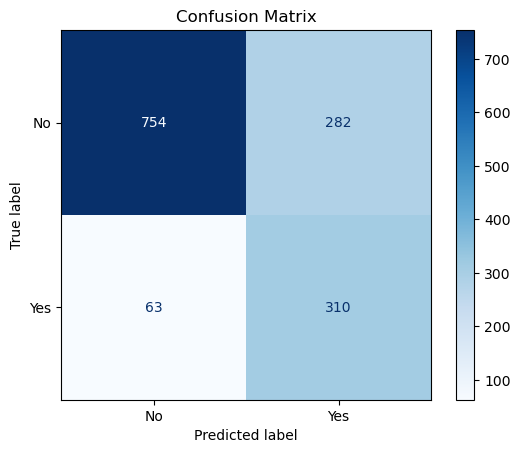

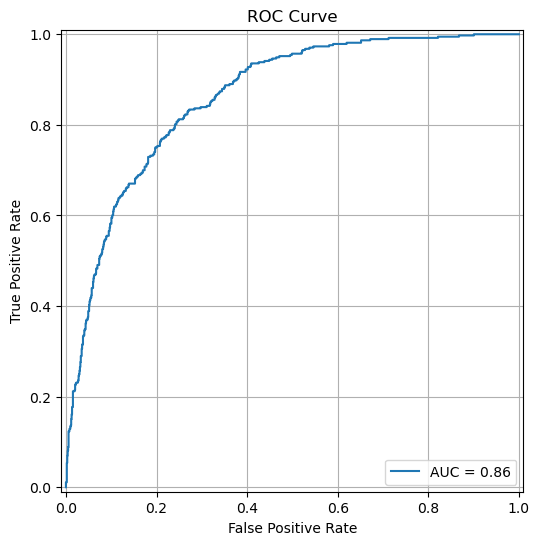

Accuracy: 0.7551454932576295
AUC-ROC: 0.8608731768919435

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.73      0.81      1036
           1       0.52      0.83      0.64       373

    accuracy                           0.76      1409
   macro avg       0.72      0.78      0.73      1409
weighted avg       0.82      0.76      0.77      1409



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

# Train logistic regression with class weighting
model_with_weights = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
model_with_weights.fit(X_train_balanced, y_train_balanced)

# Predict on test data
y_pred = model_with_weights.predict(X_test_preprocessed)
y_pred_prob = model_with_weights.predict_proba(X_test_preprocessed)[:, 1]

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["No", "Yes"])

# Plot confusion matrix
plt.figure(figsize=(8, 6))
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

# Compute and plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
roc_display.plot(ax=plt.gca())
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid()
plt.show()

# Display metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("AUC-ROC:", roc_auc)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


# Redefine models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "SVM": SVC(probability=True, random_state=42, class_weight='balanced'),
    "k-NN": KNeighborsClassifier()
}

# Function to train, predict, and evaluate a model
def evaluate_model(name, model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    metrics = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred),
        "AUC-ROC": roc_auc_score(y_test, y_pred_prob) if y_pred_prob is not None else None,
    }
    return metrics

# Evaluate all models
evaluation_results = {}
for model_name, model in models.items():
    evaluation_results[model_name] = evaluate_model(model_name, model, X_train_balanced, X_test_preprocessed, y_train_balanced, y_test)

# Create a DataFrame for the evaluation results
evaluation_df = pd.DataFrame(evaluation_results).T
print(evaluation_df)

# tools.display_dataframe_to_user(name="Model Evaluation Results", dataframe=evaluation_df)

C:\Users\Unknown1\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:07:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


                     Accuracy  Precision    Recall  F1-Score   AUC-ROC
Logistic Regression  0.755145   0.523649  0.831099  0.642487  0.860873
Random Forest        0.798439   0.619303  0.619303  0.619303  0.840083
XGBoost              0.798439   0.619946  0.616622  0.618280  0.838461
SVM                  0.765791   0.541109  0.758713  0.631696  0.841987
k-NN                 0.695529   0.453642  0.734584  0.560901  0.776248


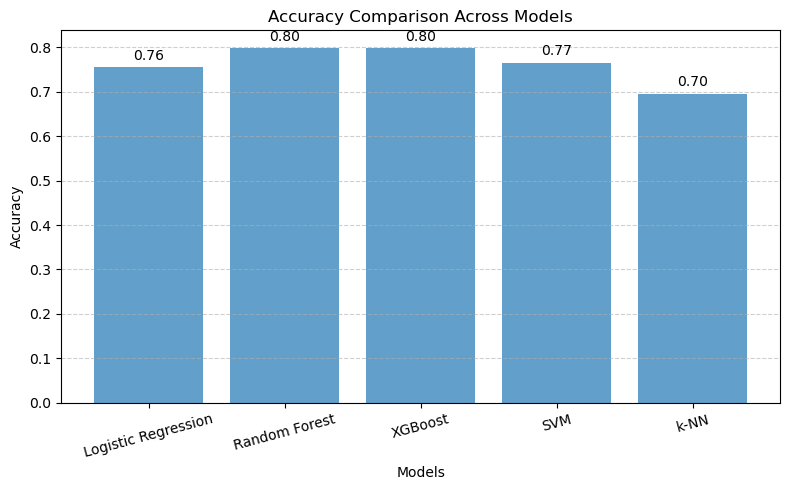

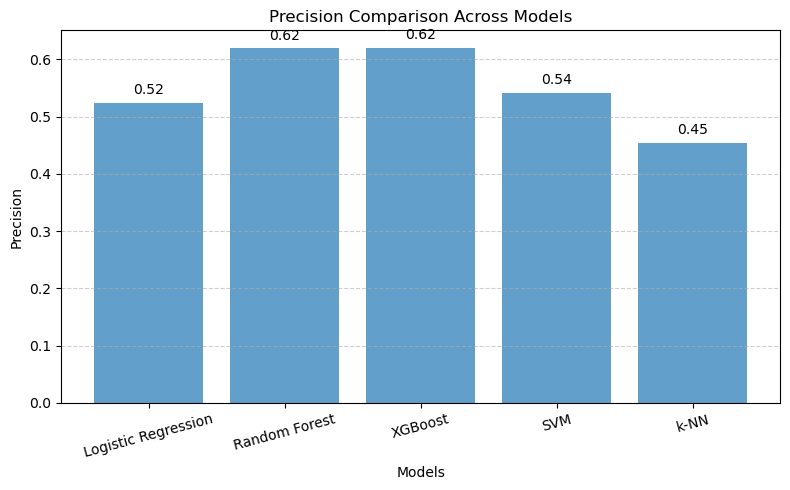

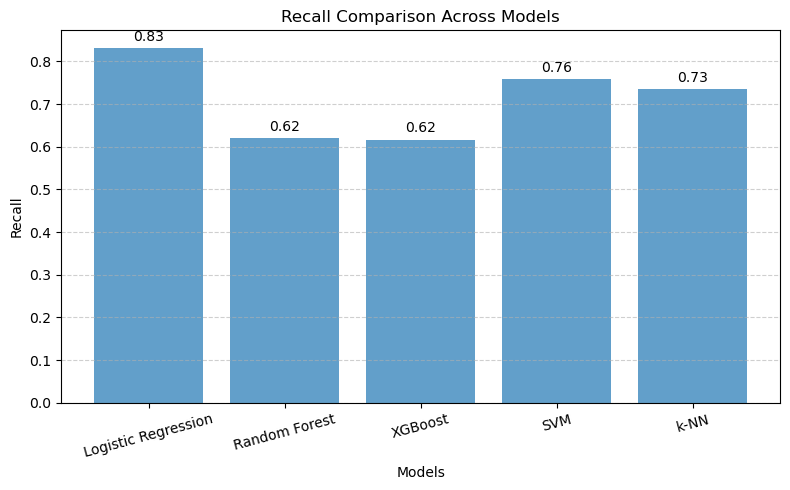

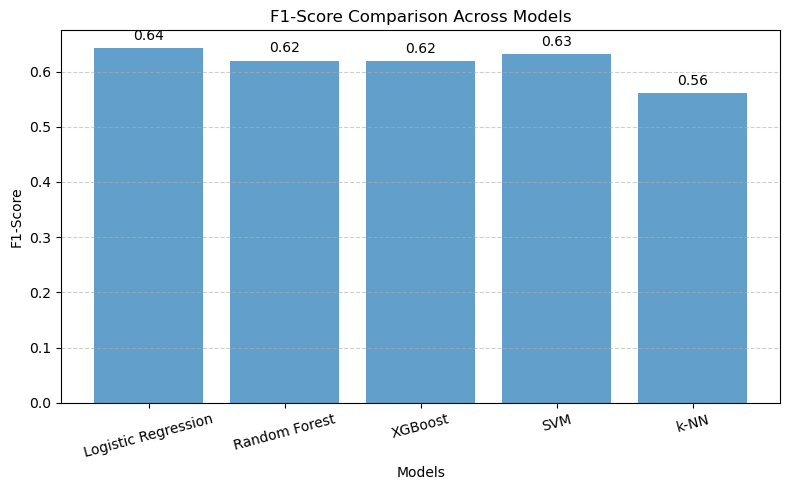

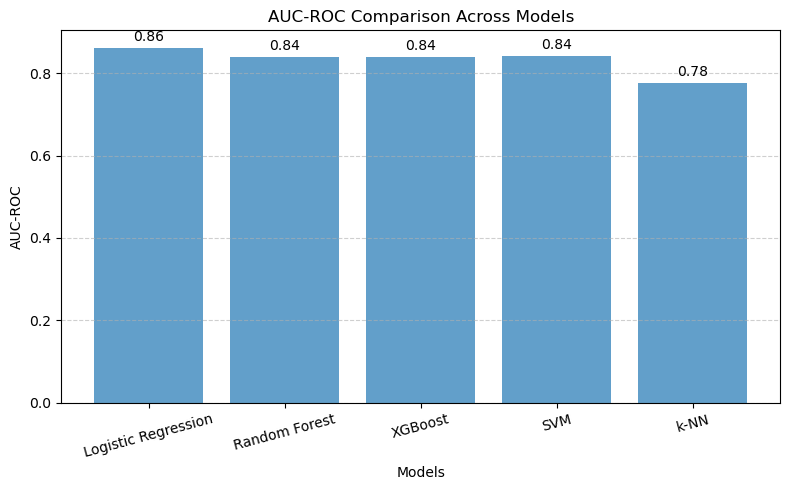

In [ ]:
# Plot each metric for all models dynamically
for metric in evaluation_df.columns:
    plt.figure(figsize=(8, 5))
    bars = plt.bar(evaluation_df.index, evaluation_df[metric], alpha=0.7)
    plt.title(f"{metric} Comparison Across Models")
    plt.ylabel(metric)
    plt.xlabel("Models")
    plt.xticks(rotation=15)
    plt.grid(axis='y', linestyle='--', alpha=0.6)

    # Add numbers on top of bars
    for bar in bars:
        plt.text(bar.get_x() + bar.get_width() / 2,
                 bar.get_height() + 0.01,
                 f"{bar.get_height():.2f}",
                 ha='center', va='bottom', fontsize=10)

    plt.tight_layout()
    plt.show()


In [ ]:
# Random Forest Model for Feature Importance
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train_balanced, y_train_balanced)

# Extract feature importance
feature_names = numerical_features.tolist() + list(preprocessor.named_transformers_['cat'].get_feature_names_out())
feature_importances = rf_model.feature_importances_

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Display the DataFrame to the user
# import ace_tools as tools; tools.display_dataframe_to_user(name="Random Forest Feature Importance", dataframe=feature_importance_df)

print(feature_importance_df)

                                  Feature  Importance
1                                  tenure    0.135696
3                            TotalCharges    0.122235
4                       AvgMonthlyCharges    0.101141
2                          MonthlyCharges    0.098650
26                      Contract_Two year    0.059830
29         PaymentMethod_Electronic check    0.053055
14                     OnlineSecurity_Yes    0.044009
27                   PaperlessBilling_Yes    0.036556
11            InternetService_Fiber optic    0.035560
25                      Contract_One year    0.034137
20                        TechSupport_Yes    0.028880
5                             gender_Male    0.023544
6                             Partner_Yes    0.023472
7                          Dependents_Yes    0.023208
16                       OnlineBackup_Yes    0.020852
10                      MultipleLines_Yes    0.019196
18                   DeviceProtection_Yes    0.016761
24                    Stream

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'class_weight': ['balanced']
}

# Perform Grid Search for Random Forest
grid_search_rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid=param_grid_rf,
    cv=5,  # 5-fold cross-validation
    scoring='roc_auc',
    n_jobs=-1
)

# Fit the GridSearchCV to the balanced training data
grid_search_rf.fit(X_train_balanced, y_train_balanced)

# Extract best parameters and score
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

print(f"best_params_rf: {best_params_rf}")
print(f"best_score_rf: {best_score_rf}")

best_params_rf: {'class_weight': 'balanced', 'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 300}
best_score_rf: 0.9336504345438692


#### Evaluate the Tuned Random Forest Model

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Train the tuned Random Forest model
tuned_rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=20,
    min_samples_split=2,
    class_weight='balanced',
    random_state=42
)
tuned_rf_model.fit(X_train_balanced, y_train_balanced)

# Predict on the test set
y_pred = tuned_rf_model.predict(X_test_preprocessed)
y_pred_prob = tuned_rf_model.predict_proba(X_test_preprocessed)[:, 1]

# Evaluate the performance of the tuned model
metrics = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Recall": recall_score(y_test, y_pred),
    "F1-Score": f1_score(y_test, y_pred),
    "AUC-ROC": roc_auc_score(y_test, y_pred_prob)
}

print(metrics)


{'Accuracy': 0.7963094393186657, 'Precision': 0.6131578947368421, 'Recall': 0.6246648793565683, 'F1-Score': 0.6188579017264276, 'AUC-ROC': 0.8431907108180566}


In [ ]:
from sklearn.metrics import precision_recall_curve, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Compute Precision-Recall curve
y_pred_prob = tuned_rf_model.predict_proba(X_test_preprocessed)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
# print(f"Regular Threshold: {thresholds}")
# Find the optimal threshold
optimal_threshold_index = (precision + recall).argmax()
optimal_threshold = thresholds[optimal_threshold_index]
print(f"Optimal Threshold: {optimal_threshold}")

# Predict with the new threshold
y_pred_optimized = (y_pred_prob >= optimal_threshold).astype(int)

# Recalculate metrics
optimized_metrics = {
    "Accuracy": accuracy_score(y_test, y_pred_optimized),
    "Precision": precision_score(y_test, y_pred_optimized),
    "Recall": recall_score(y_test, y_pred_optimized),
    "F1-Score": f1_score(y_test, y_pred_optimized),
    "AUC-ROC": roc_auc_score(y_test, y_pred_prob)  # AUC remains the same
}
print("Optimized Metrics:", optimized_metrics)


Optimal Threshold: 0.2334143264143264
Optimized Metrics: {'Accuracy': 0.6884315117104329, 'Precision': 0.4547945205479452, 'Recall': 0.8900804289544236, 'F1-Score': 0.6019945602901179, 'AUC-ROC': 0.8431907108180566}


#### Analysis of Optimized Threshold Results
The optimized threshold significantly impacted the model's behavior:

#### Metrics Overview:
- **Accuracy (68.84%)**:
  - Dropped compared to the default threshold (79.63%) because the model is now prioritizing recall over precision.
- **Precision (45.48%)**:
  - Decreased due to the increased number of false positives.
- **Recall (89.01%)**:
  - Significantly improved, catching nearly 89% of churners.
- **F1-Score (60.19%)**:
  - A reasonable balance between precision and recall, given the shift in focus.
- **AUC-ROC (84.32%)**:
  - Remains the same, as AUC is independent of the threshold.

---

#### Key Insights:
1. **High Recall**:
   - The model successfully identifies most churners, which is critical for churn prediction tasks where retaining customers is more important than minimizing false alarms.
   
2. **Lower Precision**:
   - A trade-off where more non-churners are falsely flagged, but this might be acceptable if business resources can handle these cases.

3. **Actionable Use**:
   - With this threshold, you can focus on retaining almost all churners, even if it means addressing some false positives.


#### **1. Ensemble Modeling**
Combine Random Forest, XGBoost, and Logistic Regression to potentially improve both recall and precision.

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

# Define individual models
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
logreg_model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)

# Ensemble model with VotingClassifier
ensemble_model = VotingClassifier(
    estimators=[
        ('rf', tuned_rf_model),
        ('xgb', xgb_model),
        ('logreg', logreg_model)
    ],
    voting='soft'  # Use soft voting for probability aggregation
)

# Train ensemble model on balanced training data
ensemble_model.fit(X_train_balanced, y_train_balanced)

# Predict on the test set
y_pred_ensemble = ensemble_model.predict(X_test_preprocessed)
y_pred_ensemble_prob = ensemble_model.predict_proba(X_test_preprocessed)[:, 1]

# Evaluate ensemble model
ensemble_metrics = {
    "Accuracy": accuracy_score(y_test, y_pred_ensemble),
    "Precision": precision_score(y_test, y_pred_ensemble),
    "Recall": recall_score(y_test, y_pred_ensemble),
    "F1-Score": f1_score(y_test, y_pred_ensemble),
    "AUC-ROC": roc_auc_score(y_test, y_pred_ensemble_prob)
}

print(ensemble_metrics)


C:\Users\Unknown1\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:29:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


{'Accuracy': 0.7977288857345636, 'Precision': 0.6032863849765259, 'Recall': 0.6890080428954424, 'F1-Score': 0.6433041301627034, 'AUC-ROC': 0.858026592275922}


In [ ]:
# Compute Precision-Recall curve for the ensemble model
precision_ensemble, recall_ensemble, thresholds_ensemble = precision_recall_curve(y_test, y_pred_ensemble_prob)

# Find the threshold that balances precision and recall
optimal_threshold_index_ensemble = (precision_ensemble + recall_ensemble).argmax()
optimal_threshold_ensemble = thresholds_ensemble[optimal_threshold_index_ensemble]

# Predict with the new threshold for the ensemble model
y_pred_ensemble_optimized = (y_pred_ensemble_prob >= optimal_threshold_ensemble).astype(int)

# Recalculate metrics with the optimized threshold
ensemble_optimized_metrics = {
    "Accuracy": accuracy_score(y_test, y_pred_ensemble_optimized),
    "Precision": precision_score(y_test, y_pred_ensemble_optimized),
    "Recall": recall_score(y_test, y_pred_ensemble_optimized),
    "F1-Score": f1_score(y_test, y_pred_ensemble_optimized),
    "AUC-ROC": roc_auc_score(y_test, y_pred_ensemble_prob)  # AUC remains the same
}

print(f"optimal_threshold_ensemble : {optimal_threshold_ensemble}")
print(f"ensemble_optimized_metrics : {ensemble_optimized_metrics}")


optimal_threshold_ensemble : 0.3766476743804468
ensemble_optimized_metrics : {'Accuracy': 0.7686302342086586, 'Precision': 0.5408695652173913, 'Recall': 0.8337801608579088, 'F1-Score': 0.6561181434599156, 'AUC-ROC': 0.858026592275922}


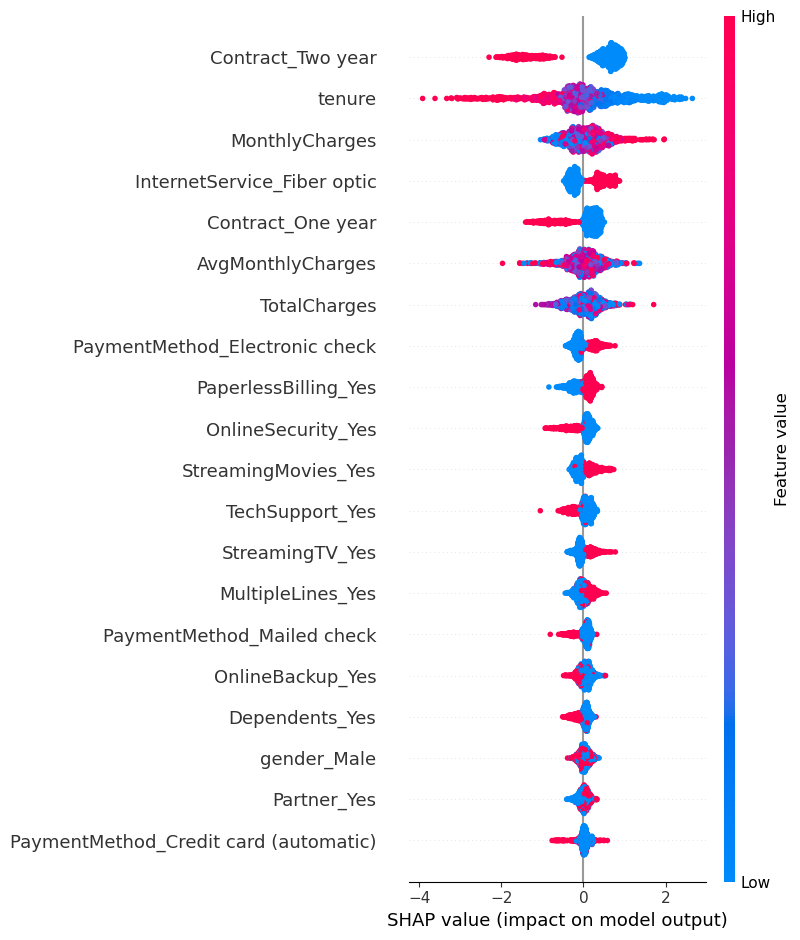

In [ ]:
# Get feature names from the preprocessing pipeline
numerical_feature_names = numerical_features.tolist()
categorical_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out()
all_feature_names = numerical_feature_names + list(categorical_feature_names)

# Initialize SHAP explainer with feature names
shap_explainer = shap.Explainer(ensemble_model.named_estimators_['xgb'], X_train_preprocessed, feature_names=all_feature_names)
shap_values = shap_explainer(X_test_preprocessed)

# Generate SHAP summary plot with actual feature names
shap.summary_plot(shap_values, X_test_preprocessed, feature_names=all_feature_names)


In [ ]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


# Define individual models
logistic_regression = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
svm = SVC(probability=True, random_state=42, class_weight='balanced')
random_forest = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
xgboost = XGBClassifier(eval_metric='logloss', random_state=42)  # Updated for deprecated `use_label_encoder`
tuned_random_forest = RandomForestClassifier(
    n_estimators=300, max_depth=20, min_samples_split=2,
    class_weight='balanced', random_state=42
)

# Define ensemble model
ensemble_model = VotingClassifier(
    estimators=[
        ('rf', tuned_random_forest),
        ('xgb', xgboost),
        ('logreg', logistic_regression)
    ],
    voting='soft'  # Use soft voting for probability aggregation
)

# Add models to dictionary
models = {
    "Logistic Regression": logistic_regression,
    "SVM": svm,
    "Random Forest": random_forest,
    "XGBoost": xgboost,
    "Tuned Random Forest": tuned_random_forest,
    "Ensemble Model": ensemble_model
}


# Function to train, predict, and evaluate a model
def evaluate_model(name, model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    metrics = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred),
        "AUC-ROC": roc_auc_score(y_test, y_pred_prob) if y_pred_prob is not None else None,
    }
    return metrics

# Evaluate all models
evaluation_results = {}
for model_name, model in models.items():
    evaluation_results[model_name] = evaluate_model(model_name, model, X_train_balanced, X_test_preprocessed, y_train_balanced, y_test)

# Create a DataFrame for the evaluation results
evaluation_df = pd.DataFrame(evaluation_results).T
print(evaluation_df)

                     Accuracy  Precision    Recall  F1-Score   AUC-ROC
Logistic Regression  0.755145   0.523649  0.831099  0.642487  0.860873
SVM                  0.765791   0.541109  0.758713  0.631696  0.841987
Random Forest        0.798439   0.619303  0.619303  0.619303  0.840083
XGBoost              0.798439   0.619946  0.616622  0.618280  0.838461
Tuned Random Forest  0.796309   0.613158  0.624665  0.618858  0.843191
Ensemble Model       0.797729   0.603286  0.689008  0.643304  0.858027


In [ ]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

# Define individual models
logistic_regression = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
svm = SVC(probability=True, random_state=42, class_weight='balanced')
random_forest = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
xgboost = XGBClassifier(eval_metric='logloss', random_state=42)  # Updated for deprecated `use_label_encoder`
tuned_random_forest = RandomForestClassifier(
    n_estimators=300, max_depth=20, min_samples_split=2,
    class_weight='balanced', random_state=42
)

# Define ensemble model
ensemble_model = VotingClassifier(
    estimators=[
        ('rf', tuned_random_forest),
        ('xgb', xgboost),
        ('logreg', logistic_regression)
    ],
    voting='soft'  # Use soft voting for probability aggregation
)

# Add models to dictionary
models = {
    "Logistic Regression": logistic_regression,
    "SVM": svm,
    "Random Forest": random_forest,
    "XGBoost": xgboost,
    "Tuned Random Forest": tuned_random_forest,
    "Ensemble Model": ensemble_model
}

# Function to calculate optimized metrics
def calculate_optimized_metrics(model, X_test, y_test):
    if not hasattr(model, "predict_proba"):
        return None, None  # Skip for models without `predict_proba`

    y_pred_prob = model.predict_proba(X_test)[:, 1]
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

    # Find the optimal threshold
    optimal_threshold_index = (precision + recall).argmax()
    optimal_threshold = thresholds[optimal_threshold_index]

    # Predict with the new threshold
    y_pred_optimized = (y_pred_prob >= optimal_threshold).astype(int)

    # Calculate optimized metrics
    optimized_metrics = {
        "Optimal Threshold": optimal_threshold,
        "Accuracy": accuracy_score(y_test, y_pred_optimized),
        "Precision": precision_score(y_test, y_pred_optimized),
        "Recall": recall_score(y_test, y_pred_optimized),
        "F1-Score": f1_score(y_test, y_pred_optimized),
        "AUC-ROC": roc_auc_score(y_test, y_pred_prob)  # AUC doesn't depend on the threshold
    }

    return optimal_threshold, optimized_metrics

# Function to train, predict, and evaluate a model
def evaluate_model(name, model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Default metrics
    metrics = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred),
        "AUC-ROC": roc_auc_score(y_test, y_pred_prob) if y_pred_prob is not None else None,
    }

    # Optimized metrics
    optimal_threshold, optimized_metrics = calculate_optimized_metrics(model, X_test, y_test)

    return metrics, optimized_metrics

# Evaluate all models
evaluation_results = {}
optimized_results = {}
optimal_thresholds = {}

for model_name, model in models.items():
    default_metrics, optimized_metrics = evaluate_model(model_name, model, X_train_balanced, X_test_preprocessed, y_train_balanced, y_test)
    evaluation_results[model_name] = default_metrics
    if optimized_metrics:
        optimized_results[model_name] = optimized_metrics
        optimal_thresholds[model_name] = optimized_metrics["Optimal Threshold"]

# Create DataFrames for the evaluation results
evaluation_df = pd.DataFrame(evaluation_results).T
optimized_evaluation_df = pd.DataFrame(optimized_results).T
optimal_thresholds_df = pd.DataFrame.from_dict(optimal_thresholds, orient='index', columns=["Optimal Threshold"])

print("Default Metrics:")
print(evaluation_df)

print("\nOptimized Metrics:")
print(optimized_evaluation_df)


Default Metrics:
                     Accuracy  Precision    Recall  F1-Score   AUC-ROC
Logistic Regression  0.755145   0.523649  0.831099  0.642487  0.860873
SVM                  0.765791   0.541109  0.758713  0.631696  0.841987
Random Forest        0.798439   0.619303  0.619303  0.619303  0.840083
XGBoost              0.798439   0.619946  0.616622  0.618280  0.838461
Tuned Random Forest  0.796309   0.613158  0.624665  0.618858  0.843191
Ensemble Model       0.797729   0.603286  0.689008  0.643304  0.858027

Optimized Metrics:
                     Optimal Threshold  Accuracy  Precision    Recall  \
Logistic Regression           0.347505  0.682044   0.451488  0.935657   
SVM                           0.154425  0.638751   0.419048  0.943700   
Random Forest                 0.140000  0.596167   0.391353  0.946381   
XGBoost                       0.036928  0.561391   0.372793  0.962466   
Tuned Random Forest           0.233414  0.688432   0.454795  0.890080   
Ensemble Model              

In [ ]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import StratifiedKFold
import pandas as pd
import numpy as np

# Define individual models
logistic_regression = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
svm = SVC(probability=True, random_state=42, class_weight='balanced')
random_forest = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
xgboost = XGBClassifier(eval_metric='logloss', random_state=42)
tuned_random_forest = RandomForestClassifier(
    n_estimators=300, max_depth=20, min_samples_split=2,
    class_weight='balanced', random_state=42
)

# Define ensemble model
ensemble_model = VotingClassifier(
    estimators=[
        ('rf', tuned_random_forest),
        ('xgb', xgboost),
        ('logreg', logistic_regression)
    ],
    voting='soft'
)

# Add models to dictionary
models = {
    "Logistic Regression": logistic_regression,
    "SVM": svm,
    "Random Forest": random_forest,
    "XGBoost": xgboost,
    "Tuned Random Forest": tuned_random_forest,
    "Ensemble Model": ensemble_model
}

# Function to calculate optimized metrics
def calculate_optimized_metrics(y_test, y_pred_prob):
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
    optimal_threshold_index = (precision + recall).argmax()
    optimal_threshold = thresholds[optimal_threshold_index]
    y_pred_optimized = (y_pred_prob >= optimal_threshold).astype(int)
    optimized_metrics = {
        "Optimal Threshold": optimal_threshold,
        "Accuracy": accuracy_score(y_test, y_pred_optimized),
        "Precision": precision_score(y_test, y_pred_optimized),
        "Recall": recall_score(y_test, y_pred_optimized),
        "F1-Score": f1_score(y_test, y_pred_optimized),
        "AUC-ROC": roc_auc_score(y_test, y_pred_prob)  # AUC remains the same
    }
    return optimized_metrics

# Function to perform k-fold cross-validation
def cross_validate_model(model, X, y, k=5):
    skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
    default_metrics_list = []
    optimized_metrics_list = []

    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

        # Default metrics
        default_metrics = {
            "Accuracy": accuracy_score(y_test, y_pred),
            "Precision": precision_score(y_test, y_pred),
            "Recall": recall_score(y_test, y_pred),
            "F1-Score": f1_score(y_test, y_pred),
            "AUC-ROC": roc_auc_score(y_test, y_pred_prob) if y_pred_prob is not None else None
        }
        default_metrics_list.append(default_metrics)

        # Optimized metrics
        if y_pred_prob is not None:
            optimized_metrics = calculate_optimized_metrics(y_test, y_pred_prob)
            optimized_metrics_list.append(optimized_metrics)

    # Average metrics over k folds
    avg_default_metrics = {metric: np.mean([fold[metric] for fold in default_metrics_list]) for metric in default_metrics_list[0]}
    avg_optimized_metrics = {metric: np.mean([fold[metric] for fold in optimized_metrics_list]) for metric in optimized_metrics_list[0]} if optimized_metrics_list else None

    return avg_default_metrics, avg_optimized_metrics

# Evaluate all models using k-fold cross-validation
k = 5  # Number of folds
evaluation_results = {}
optimized_results = {}

for model_name, model in models.items():
    print(f"Evaluating {model_name} with {k}-fold cross-validation...")
    avg_default_metrics, avg_optimized_metrics = cross_validate_model(model, X_train_balanced, y_train_balanced, k)
    evaluation_results[model_name] = avg_default_metrics
    if avg_optimized_metrics:
        optimized_results[model_name] = avg_optimized_metrics

# Create DataFrames for the evaluation results
evaluation_df = pd.DataFrame(evaluation_results).T
optimized_evaluation_df = pd.DataFrame(optimized_results).T

print("\nDefault Cross-Validation Metrics:")
print(evaluation_df)

print("\nOptimized Cross-Validation Metrics:")
print(optimized_evaluation_df)


Evaluating Logistic Regression with 5-fold cross-validation...
Evaluating SVM with 5-fold cross-validation...
Evaluating Random Forest with 5-fold cross-validation...
Evaluating XGBoost with 5-fold cross-validation...
Evaluating Tuned Random Forest with 5-fold cross-validation...
Evaluating Ensemble Model with 5-fold cross-validation...

Default Cross-Validation Metrics:
                     Accuracy  Precision    Recall  F1-Score   AUC-ROC
Logistic Regression  0.770542   0.748528  0.815128  0.780361  0.849826
SVM                  0.789874   0.773521  0.819958  0.795997  0.876600
Random Forest        0.854157   0.848282  0.862735  0.855398  0.927793
XGBoost              0.847391   0.849698  0.844126  0.846845  0.931359
Tuned Random Forest  0.856211   0.846790  0.869982  0.858144  0.929352
Ensemble Model       0.852466   0.834440  0.879649  0.856336  0.926430

Optimized Cross-Validation Metrics:
                     Optimal Threshold  Accuracy  Precision    Recall  \
Logistic Regression

Default Metrics:
                     Accuracy  Precision    Recall  F1-Score   AUC-ROC
Logistic Regression  0.755145   0.523649  0.831099  0.642487  0.860873
SVM                  0.765791   0.541109  0.758713  0.631696  0.841987
Random Forest        0.798439   0.619303  0.619303  0.619303  0.840083
XGBoost              0.798439   0.619946  0.616622  0.618280  0.838461
Tuned Random Forest  0.796309   0.613158  0.624665  0.618858  0.843191
Ensemble Model       0.797729   0.603286  0.689008  0.643304  0.858027

Optimized Metrics:
                     Optimal Threshold  Accuracy  Precision    Recall  \
Logistic Regression           0.347505  0.682044   0.451488  0.935657   
SVM                           0.154425  0.638751   0.419048  0.943700   
Random Forest                 0.140000  0.596167   0.391353  0.946381   
XGBoost                       0.036928  0.561391   0.372793  0.962466   
Tuned Random Forest           0.233414  0.688432   0.454795  0.890080   
Ensemble Model              

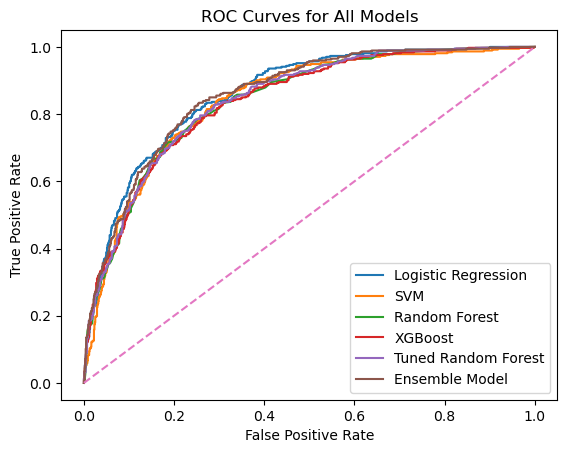

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (precision_recall_curve, accuracy_score, precision_score,
                             recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix)
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt

# Define individual models
logistic_regression = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
svm = SVC(probability=True, random_state=42, class_weight='balanced')
random_forest = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
xgboost = XGBClassifier(eval_metric='logloss', random_state=42)
tuned_random_forest = RandomForestClassifier(
    n_estimators=300, max_depth=20, min_samples_split=2,
    class_weight='balanced', random_state=42
)

# Define ensemble model
ensemble_model = VotingClassifier(
    estimators=[
        ('rf', tuned_random_forest),
        ('xgb', xgboost),
        ('logreg', logistic_regression)
    ],
    voting='soft'
)

# Add models to dictionary
models = {
    "Logistic Regression": logistic_regression,
    "SVM": svm,
    "Random Forest": random_forest,
    "XGBoost": xgboost,
    "Tuned Random Forest": tuned_random_forest,
    "Ensemble Model": ensemble_model
}

def calculate_optimized_metrics(y_test, y_pred_prob):
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
    optimal_threshold_index = (precision + recall).argmax()
    optimal_threshold = thresholds[optimal_threshold_index]
    y_pred_optimized = (y_pred_prob >= optimal_threshold).astype(int)
    optimized_metrics = {
        "Optimal Threshold": optimal_threshold,
        "Accuracy": accuracy_score(y_test, y_pred_optimized),
        "Precision": precision_score(y_test, y_pred_optimized),
        "Recall": recall_score(y_test, y_pred_optimized),
        "F1-Score": f1_score(y_test, y_pred_optimized),
        "AUC-ROC": roc_auc_score(y_test, y_pred_prob)
    }
    return optimized_metrics

def evaluate_model(name, model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Default metrics
    metrics = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred),
        "AUC-ROC": roc_auc_score(y_test, y_pred_prob) if y_pred_prob is not None else None,
    }

    # Optimized metrics
    optimized_metrics = None
    if y_pred_prob is not None:
        optimized_metrics = calculate_optimized_metrics(y_test, y_pred_prob)

    return metrics, optimized_metrics, y_pred, y_pred_prob

# Evaluate all models on the given train/test split
evaluation_results = {}
optimized_results = {}
optimal_thresholds = {}
model_predictions = {}
model_probabilities = {}

for model_name, model in models.items():
    default_metrics, optimized_metrics, y_pred, y_pred_prob = evaluate_model(
        model_name, model, X_train_balanced, X_test_preprocessed, y_train_balanced, y_test
    )
    evaluation_results[model_name] = default_metrics
    model_predictions[model_name] = y_pred
    if y_pred_prob is not None:
        model_probabilities[model_name] = y_pred_prob
    if optimized_metrics:
        optimized_results[model_name] = optimized_metrics
        optimal_thresholds[model_name] = optimized_metrics["Optimal Threshold"]

evaluation_df = pd.DataFrame(evaluation_results).T
optimized_evaluation_df = pd.DataFrame(optimized_results).T
optimal_thresholds_df = pd.DataFrame.from_dict(optimal_thresholds, orient='index', columns=["Optimal Threshold"])

print("Default Metrics:")
print(evaluation_df)
print("\nOptimized Metrics:")
print(optimized_evaluation_df)
print("\nOptimal Thresholds:")
print(optimal_thresholds_df)

# Compute and display confusion matrices for each model
for model_name, y_pred in model_predictions.items():
    cm = confusion_matrix(y_test, y_pred)
    print(f"\nConfusion Matrix for {model_name}:")
    print(cm)

# Plot ROC curves for all models that produce probabilities
plt.figure()
for model_name, y_pred_prob in model_probabilities.items():
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    plt.plot(fpr, tpr, label=model_name)

plt.plot([0, 1], [0, 1], linestyle='--')  # Diagonal line for reference
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Models')
plt.legend(loc="lower right")
plt.show()


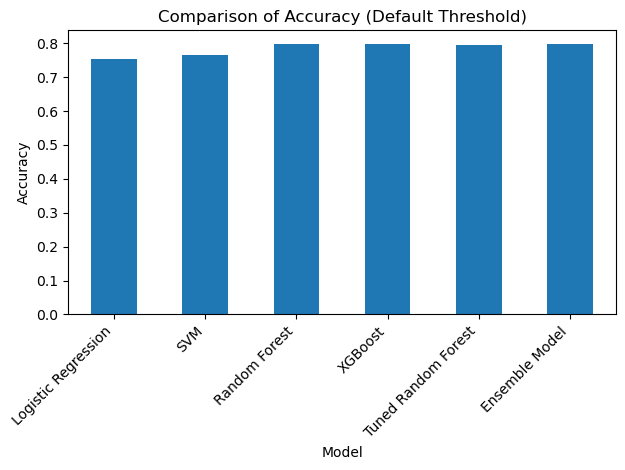

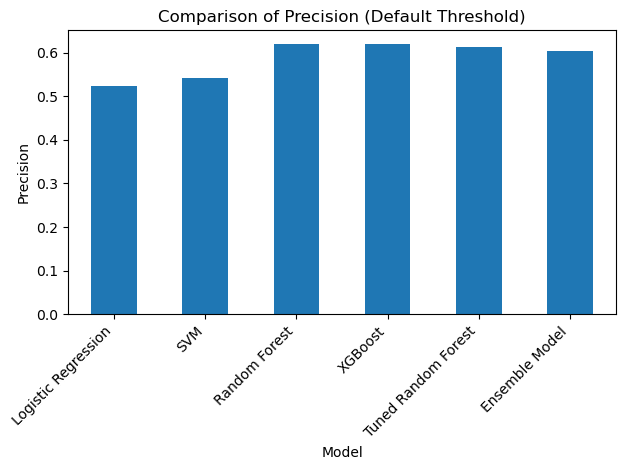

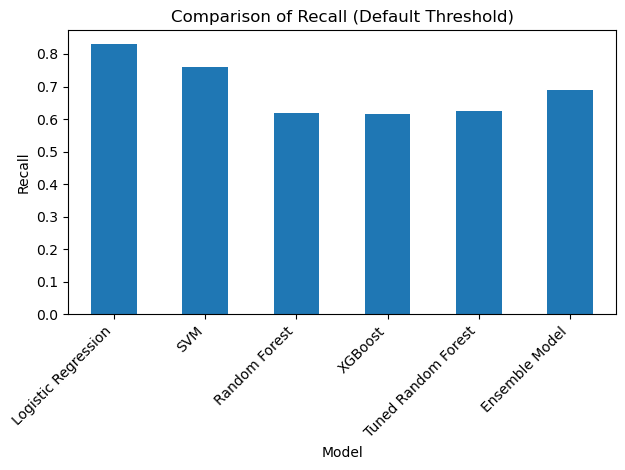

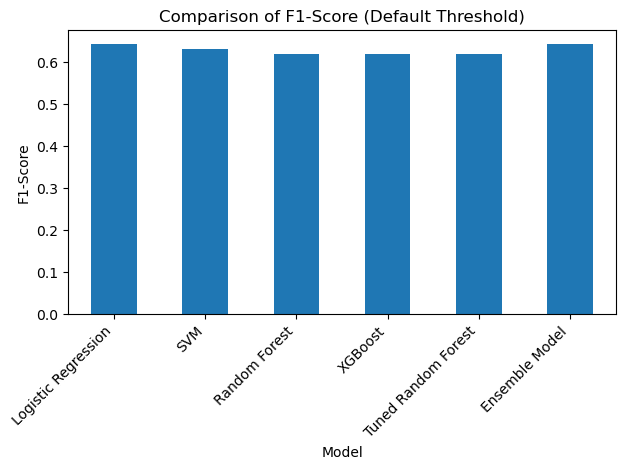

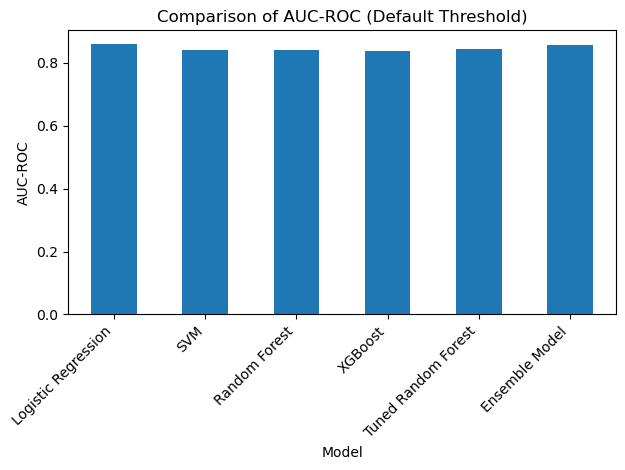

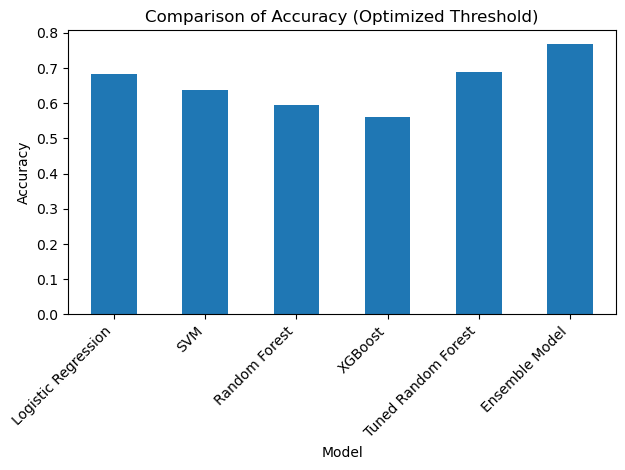

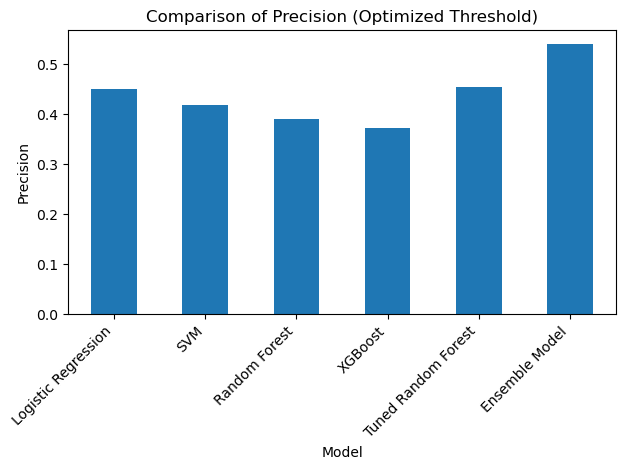

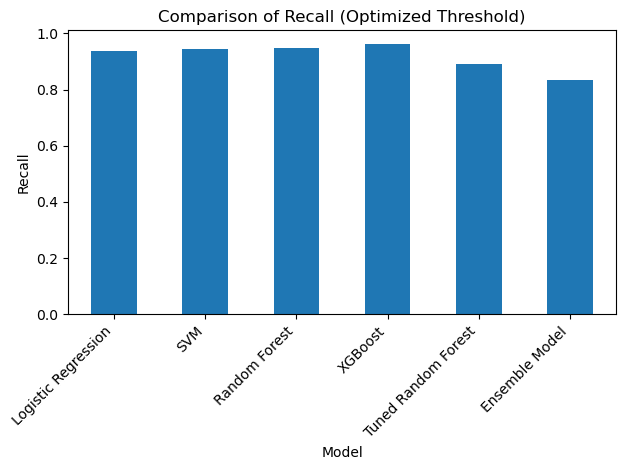

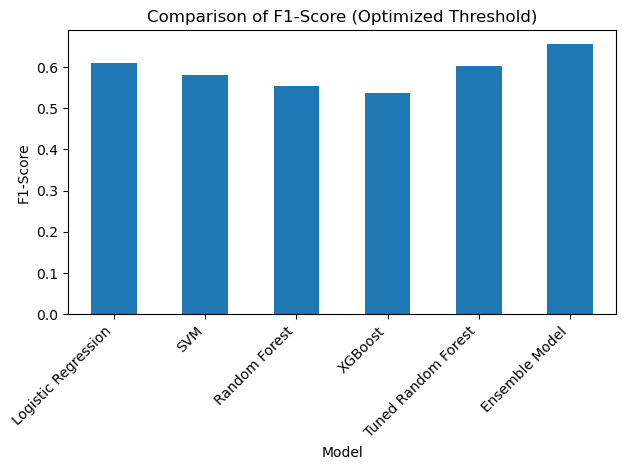

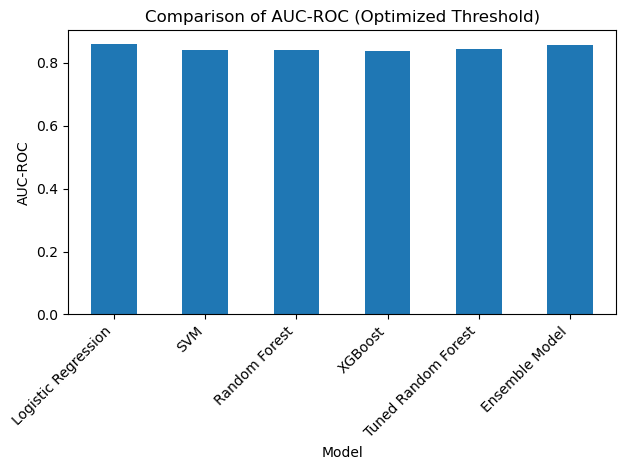

In [ ]:
import matplotlib.pyplot as plt

# Plot bar charts for default metrics
for metric in ["Accuracy", "Precision", "Recall", "F1-Score", "AUC-ROC"]:
    if metric in evaluation_df.columns:
        plt.figure()
        evaluation_df[metric].plot(kind='bar')
        plt.title(f'Comparison of {metric} (Default Threshold)')
        plt.xlabel('Model')
        plt.ylabel(metric)
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

# Plot bar charts for optimized metrics (only if available)
if not optimized_evaluation_df.empty:
    for metric in ["Accuracy", "Precision", "Recall", "F1-Score", "AUC-ROC"]:
        if metric in optimized_evaluation_df.columns:
            plt.figure()
            optimized_evaluation_df[metric].plot(kind='bar')
            plt.title(f'Comparison of {metric} (Optimized Threshold)')
            plt.xlabel('Model')
            plt.ylabel(metric)
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            plt.show()


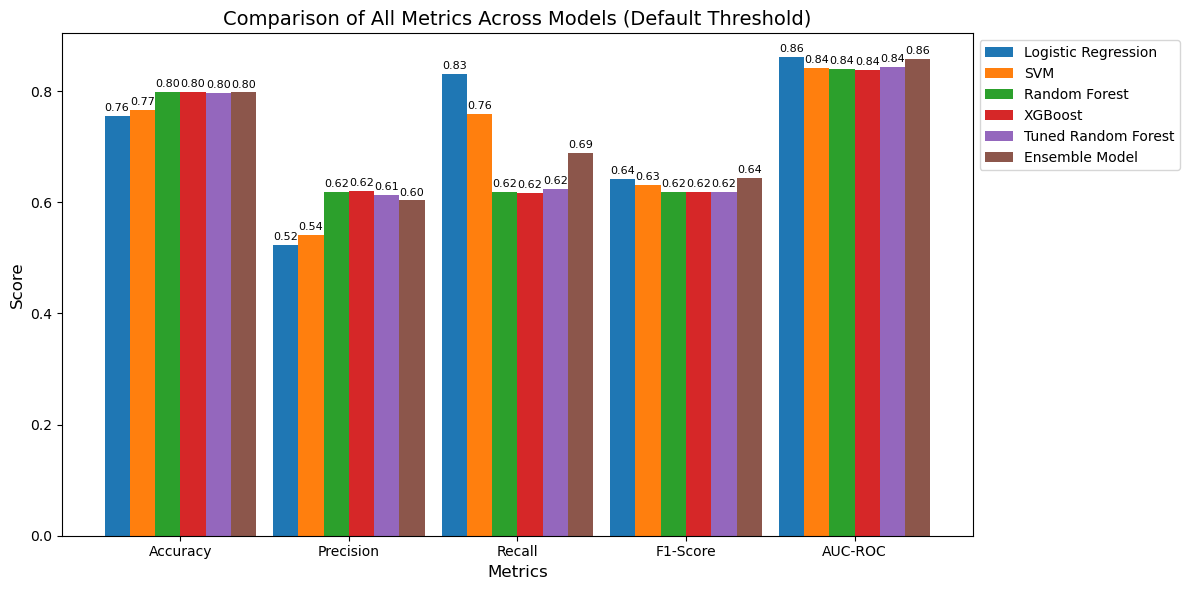

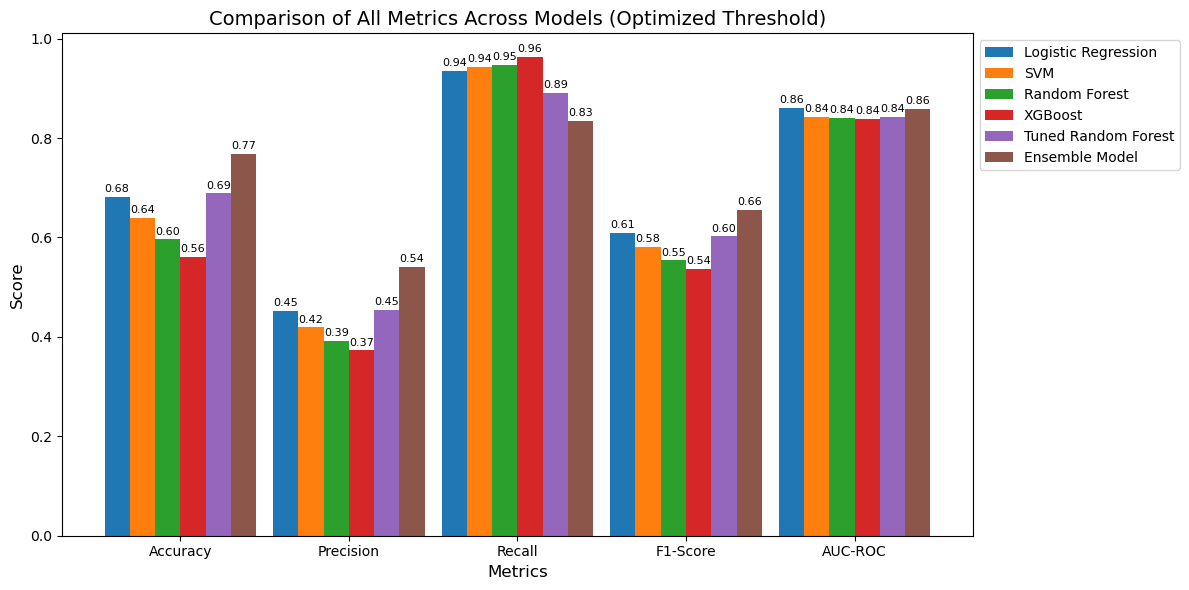

In [ ]:
import matplotlib.pyplot as plt

metrics_order = ["Accuracy", "Precision", "Recall", "F1-Score", "AUC-ROC"]

# Filter and reorder columns in default and optimized DataFrames
evaluation_filtered = evaluation_df[metrics_order]
optimized_filtered = optimized_evaluation_df[metrics_order]

# Plot default metrics
eval_transposed = evaluation_filtered.T
fig, ax = plt.subplots(figsize=(12, 6))  # Increased figure size
bars = eval_transposed.plot(kind='bar', ax=ax, width=0.9)

# Annotate each bar in the default metrics chart
for p in bars.patches:
    height = p.get_height()
    if not pd.isnull(height):
        ax.annotate(
            f'{height:.2f}',
            (p.get_x() + p.get_width() / 2, height),
            ha='center', va='bottom',
            fontsize=8,  # Slightly smaller font
            rotation=0,
            xytext=(0, 2),  # Add a small vertical offset to separate text from bar
            textcoords="offset points"
        )

ax.set_title('Comparison of All Metrics Across Models (Default Threshold)', fontsize=14)
ax.set_xlabel('Metrics', fontsize=12)
ax.set_ylabel('Score', fontsize=12)
ax.tick_params(axis='x', labelrotation=0, labelsize=10)
ax.tick_params(axis='y', labelsize=10)

# Move legend outside the plot
ax.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))

plt.tight_layout()
plt.show()

# Plot optimized metrics
eval_transposed_optimized = optimized_filtered.T
fig, ax = plt.subplots(figsize=(12, 6))  # Increased figure size
bars_opt = eval_transposed_optimized.plot(kind='bar', ax=ax, width=0.9)

# Annotate each bar in the optimized metrics chart
for p in bars_opt.patches:
    height = p.get_height()
    if not pd.isnull(height):
        ax.annotate(
            f'{height:.2f}',
            (p.get_x() + p.get_width() / 2, height),
            ha='center', va='bottom',
            fontsize=8,  # Slightly smaller font
            rotation=0,
            xytext=(0, 2),  # Vertical offset
            textcoords="offset points"
        )

ax.set_title('Comparison of All Metrics Across Models (Optimized Threshold)', fontsize=14)
ax.set_xlabel('Metrics', fontsize=12)
ax.set_ylabel('Score', fontsize=12)
ax.tick_params(axis='x', labelrotation=0, labelsize=10)
ax.tick_params(axis='y', labelsize=10)

# Move legend outside the plot
ax.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))

plt.tight_layout()
plt.show()


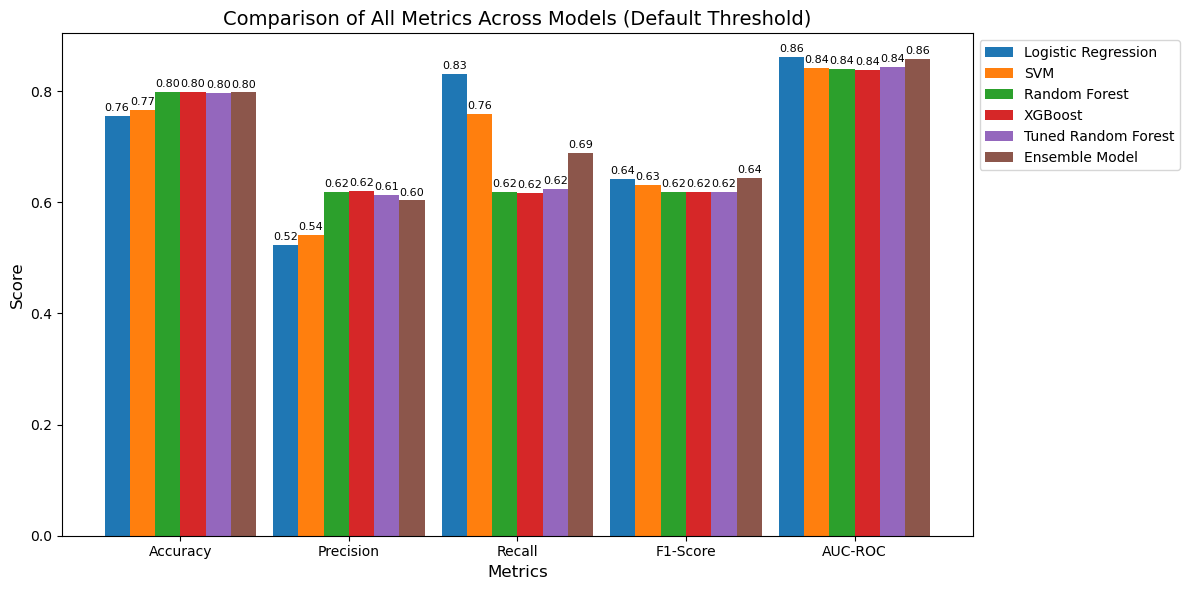

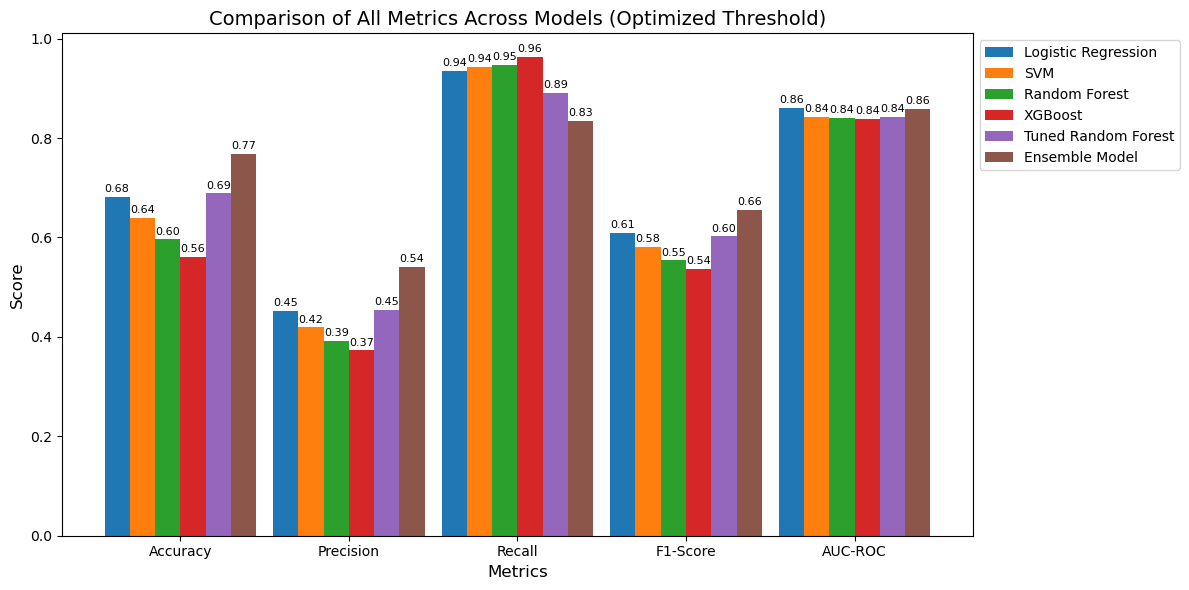

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Define the metrics to plot (excluding "Optimal Threshold" for the optimized DataFrame)
metrics_order = ["Accuracy", "Precision", "Recall", "F1-Score", "AUC-ROC"]

# Filter columns in default and optimized DataFrames
evaluation_filtered = evaluation_df[metrics_order]
optimized_filtered = optimized_evaluation_df[metrics_order]

# Function to create a grouped bar chart with annotations
def plot_grouped_bar_with_annotations(df, title):
    # Transpose so metrics are on the x-axis
    df_transposed = df.T

    fig, ax = plt.subplots(figsize=(12, 6))
    bars = df_transposed.plot(kind='bar', ax=ax, width=0.9)

    # Annotate each bar
    for p in bars.patches:
        height = p.get_height()
        if not pd.isnull(height):
            ax.annotate(
                f'{height:.2f}',
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom',
                fontsize=8,
                xytext=(0, 2),
                textcoords="offset points"
            )

    ax.set_title(title, fontsize=14)
    ax.set_xlabel('Metrics', fontsize=12)
    ax.set_ylabel('Score', fontsize=12)
    ax.tick_params(axis='x', labelrotation=0, labelsize=10)
    ax.tick_params(axis='y', labelsize=10)
    ax.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))

    plt.tight_layout()
    plt.show()

# Plot default metrics
plot_grouped_bar_with_annotations(evaluation_filtered, 'Comparison of All Metrics Across Models (Default Threshold)')

# Plot optimized metrics (if available and not empty)
if not optimized_filtered.empty:
    plot_grouped_bar_with_annotations(optimized_filtered, 'Comparison of All Metrics Across Models (Optimized Threshold)')
